# Modelo de Lucas

Tenemos un modelo en el que la producción de capital humano genera crecimiento. El modelo en su versión más sencilla está descrito por las siguientes ecuaciones:

$$Y_t=AH_t^\alpha (u_tL_t)^{1-\alpha}$$
$$h_{t+1}=h_t+b(1-u_t)h_t$$
$$y_t=c_t$$
$$u(c_t)=c_t$$
$$L_t=L \quad \forall t,\\ k_t=0$$

La solución de este modelo nos muestra que el capital crece según

$$\left[\beta\left(\frac{(2\alpha-1)}{1-\alpha}bu^*+1+b\right)\right]^{\frac{1}{1-\alpha}}-1=b(1-u^*)$$

De manera que la tasa de crecimiento está dada por

$$\frac{\dot{y_t}}{y_t}=\alpha\frac{\dot{h_t}}{h_t}=\alpha b(1-u^*)$$

<!-- Para poder hablar de un equilibrio de largo plazo, nos interesa saber cómo es la distribución de trabajadores $u^*$. Ya sabemos que debe ser un valor constante, pues representa el punto en el que no hay incentivos a mover trabajo de un tipo de producción al otro. Sin embargo, esta ecuación tiene un problema y es que es muy difícil, incluso imposible, despejar este $u^*$ y encontrar una solución analítica. -->

Tenemos dos alternativas:
1. Hacer algún supuesto. En la versión del libro se impone crecimiento balanceado, de manera que se puede despejar $u^*$.
2. Utilizar métodos numéricos: Hacemos una simulación para encontrar el valor luego de asignar unos valores de parámetros. Vamos a aplicar lo que aprendimos de métodos numéricos a este caso en particular.

In [4]:
#Llamo los paquetes que voy a utilizar
import numpy as np
import matplotlib.pylab as plt
import scipy

# Métodos numéricos para macroeconomía

Muchas veces en macroeconomía nos encontramos con ecuaciones o sistemas de ecuaciones que no podemos resolver analíticamente. Es decir, ecuaciones cuya solución no podemos expresar en términos de funciones conocidas. En estos casos recurrimos a métodos numéricos para solucionarlas. <br>

Estos problemas suelen ser equivalentes a encontrar las raíces de una función (los valores para los que esta es cero). Este tipo de problemas se ha estudiado desde hace más de 3 siglos, y consiste en algoritmos de búsqueda de estas raíces. <br>

En este script veremos cómo resolver ecuaciones no lineales empleando el método de Newton-Raphson y el método de Bisecciones. <br>

Nos centraremos en el caso de una dimensión. Estos problemas se ven de la siguiente forma:

$$f(x)=g(x)$$ 

Donde $f$ y $g$ son diferenciables. <br>

Este problema lo transformamos a:

$$H(x)=0$$

Con $H(x)=f(x)-g(x)$. Y el problema se vuelve el de encontrar las raices de $H$.




# Newton-Raphson

Para este método aprovechamos que conocemos la función $H(x)$ (que es diferenciable), y podemos computar su derivada $H'(x)$. <br>

Buscamos los ceros de manera recursiva de la siguiente forma:

$$x_{n+1}=x_n-\frac{H(x_n)}{H'(x_n)}$$

$x_{n+1}$ estará más cerca a un cero de $H(x)$ que $x_n$. Llamemos $x^*$ a esta raíz. <br>

La intuición es que $(x_{n+1},0)$ es la intersección entre la recta tangente a $H(x)$ en $(0,H(x_n))$, y acerca $x$ al valor en que $H$ cruca el cero. Pues, la derivada va indicando en qué dirección se mueve la función, y el cambio en la función evaluada en los interceptos de la recta con el eje $x$ dicen si toca $x_{n+1}<x_n$ o si $x_{n+1}>x_n$. <br>

Computacionalmente, jamás se tendrá una respuesta exacta, por tanto toca darle al computador un criterio para detener el cálculo. Así, dado un punto inicial $x_0$ para buscar $x^*$ y un número de iteraciones, este algoritmo dará una solución a la ecuación $H(x)=0$.

Problemas: si la función tiene más de un cero, solo encuentra uno, dependiendo de $x_0$. Si la función tiene puntos en los que $H'(x)=0$, se demora más en converger y no necesariamente al cero más cercano a $x_0$.

Véase: https://en.wikipedia.org/wiki/Newton%27s_method

### Definición de la función:

Suponga que queremos buscar la solución a una ecuación de la forma:

  $$e^{ax}=mx+b$$
  
Pueden verificar que por más álgebra que hagan llegarán a decir $x=...$ <br>

La escribimos como una función igualada a cero

$$e^{ax}-mx-b=0$$

En particular, busquemos la solución a:

$$e^{x}=x+2$$


Entonces $H(x)=e^x -x-2$ y $H'(x)=e^x-1$

Programamos la función y su derivada: 

In [138]:
# Parámetros:
a=1
b=2
m=1

#Función y derivada:

def funcion(x):
    return (np.exp(1)**x)-x-2

def derivada(x): 
    return (np.exp(1)**x)-1

#Noten que estamos incorporando los valores de los parámetros, pero podemos dejarlos expresados como a, b y m.

Visualizamos la función:

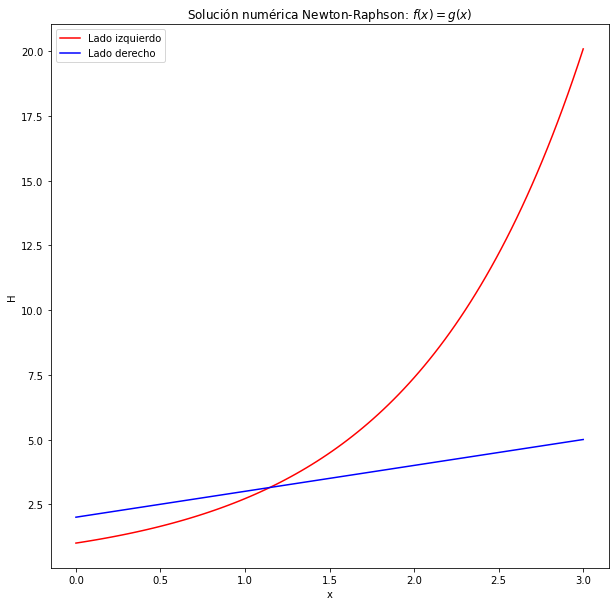

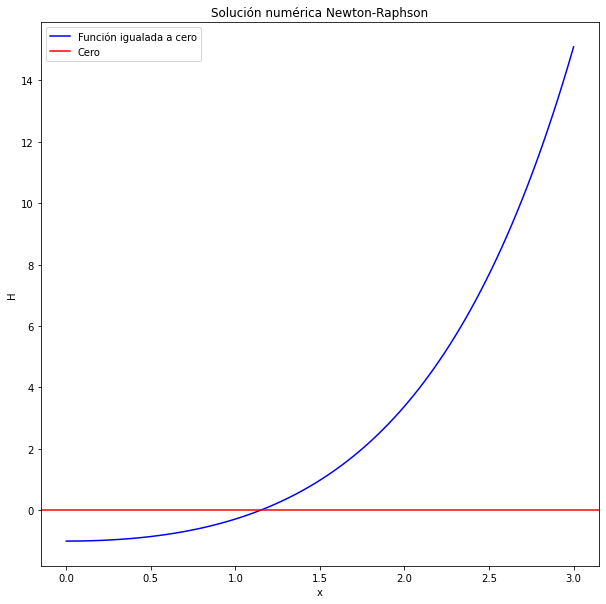

In [139]:
u=np.linspace(0,3,100) #El espacio de la gráfica va de 0 a 3

#Grafico f(x) y g(x) por aparte
plt.figure(figsize=(10,10)) #Tamaño de la gráfica
plt.title('Solución numérica Newton-Raphson: $f(x)=g(x)$') #Título
plt.plot(u,np.exp(u), color='r', label='Lado izquierdo') #Grafico f(x)
plt.plot(u,u+2, color='b', label='Lado derecho') #Grafico g(x)
plt.xlabel("x") #Etiqueta del eje x
plt.ylabel("H") #Etiqueta del eje y
plt.legend() #Leyenda

#Grafico H(x) y 0
plt.figure(figsize=(10,10)) #Tamaño de la gráfica
plt.title('Solución numérica Newton-Raphson') #Título
plt.plot(u,funcion(u), color='b', label='Función igualada a cero') #Grafico la función H(x) y le pongo su label
plt.axhline(y=0, color='r', label='Cero') #Grafico el 0 en la gráfica
plt.xlabel("x") #Etiqueta del eje x
plt.ylabel("H") #Etiqueta del eje y
plt.legend() #Leyenda


Programamos el algoritmo de Newton-Raphson: <br>

Necesitamos un punto inicial cerca a la raíz y un número de pasos después del cual el algoritmo nos diga qué valor halló.

In [140]:
def NR(x,N): #Defino la función. x es el punto inicial, N es el número de iteraciones
    for i in range(N):
        x=x-(funcion(x)/derivada(x)) # Esta línea actualiza el valor de la aproximación al cero. Hace N actualizaciones
    return x

1.1461932206205827


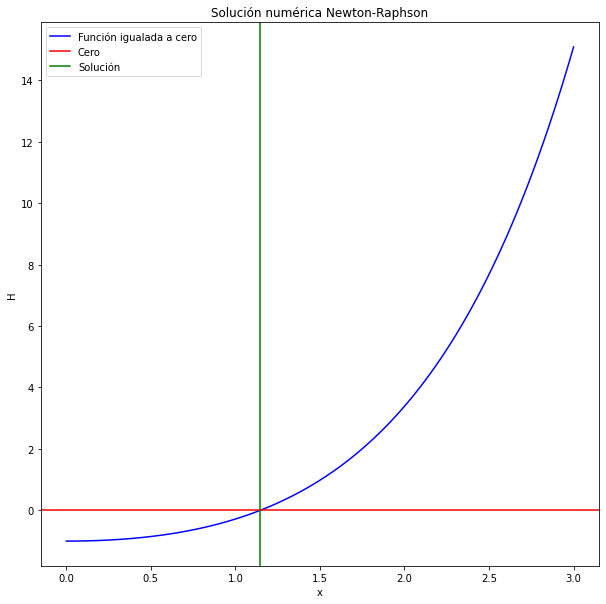

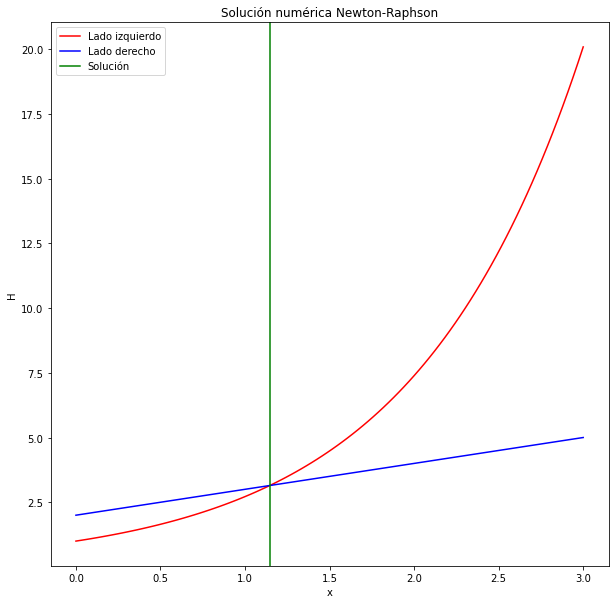

In [148]:
# El método converge muy rápido. Por las gráficas pongámoslo a buscar cerca a 1 por 10 iteraciones

sol=NR(1,10)
print(sol)
#La solución es 1.1461. Si cambio a 5,5 no alcanza a llegar

#Grafico
u=np.linspace(0,3,100)

plt.figure(figsize=(10,10))
plt.title('Solución numérica Newton-Raphson')
plt.plot(u,funcion(u), color='b', label='Función igualada a cero')
plt.axhline(y=0, color='r', label='Cero')
plt.axvline(x=sol, color='g', label='Solución')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()

plt.figure(figsize=(10,10))
plt.title('Solución numérica Newton-Raphson')
plt.plot(u,np.exp(u), color='r', label='Lado izquierdo')
plt.plot(u,u+2, color='b', label='Lado derecho')
plt.axvline(x=sol, color='g', label='Solución')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()

# Método de bisecciones
Este método busca los ceros de una función continua (no necesariamente diferenciable) de la cuál conocemos que existe una raíz en un intervalo dado. Es decir, para que el algoritmo converja debemos garantizar solución en el intervalo definido. <br>

Este algoritmo requiere que la función cambie de signo en el intervalo dado, y va acotando la búsqueda a medida que halla cambios de signo. Por ejemplo, si arranca en un valor positivo, prueba otro valor hasta dar con un valor negativo. Si cambió de signo, significa que el cero está entre los últimos 2 valores intentados. Entonces, prueba con el promedio, si cambia de signo, toma los últimos dos valores, los promedia prueba y sigue. Sigue probando valores, cada vez en intervalos más pequeños, hasta que se acerca al cero con la precisión deseada. <br>

Este método necesita el intervalo de búsqueda y la precisión deseada: cuántas posiciones decimales queremos correctas. <br>

Véase: https://en.wikipedia.org/wiki/Bisection_method

In [150]:
def bis(inf,sup,pres):
#inf:= cota inferior inicial del intervalo de busqueda, fin:=cota superior inicial del intervalo de busqueda, pres:=presicion en numero de cifras decimales
#Para que funcione, la funcion ha de ser continua, debe suceder que fun(inf)*fun(sup)<0 de modo que la funcion haya cambiado de signo en [inf,sup], lo que garantiza que hay al menos un cero
    med=(sup+inf)/2
    cero=0
    while (sup-inf)/2>pres: #Si fuera menor, estaría más cerca de lo que estoy exigiéndole, por lo que ya llegué a mi solución y no tengo que iniciar el loop
        if funcion(med)==0: #Si la función evaluada en el promedio es 0, ya llegué a la raíz
            cero=med
        elif funcion(inf)*funcion(med)<0: #Si no, empiezo a ver si dentro del intervalo cambio de signo
            sup=med #Corto el intervalo de tal forma que la cota superior sea el promedio al que llegué
        else:
            inf=med #Si estoy en el otro signo, corto el intervalo de tal forma que la cota inferior sea el promedio al que llegué
        med=(sup+inf)/2 #Transformo el intervalo con los nuevos valores
        cero=med #Sigo hasta que llegue a la raíz que estoy buscando
    return cero


In [10]:
#Sabemos que el cero está entre 1 y 2. Lo queremos correcto a 4 posiciones decimales
sol=bis(1,2,0.00001)
print(sol)

1.146193504333496


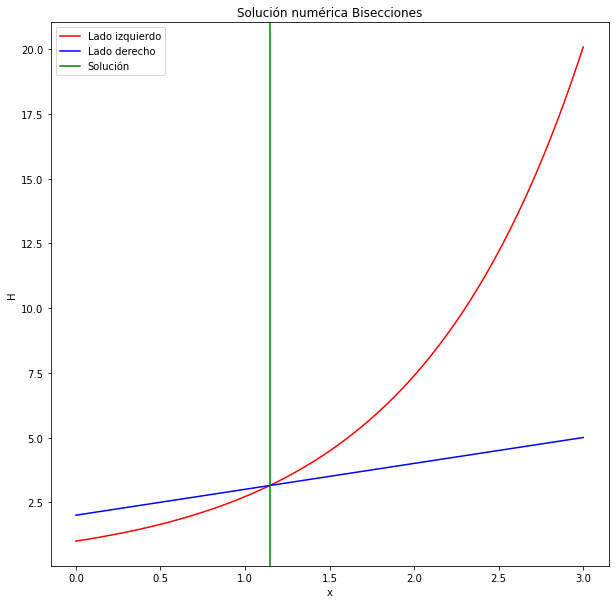

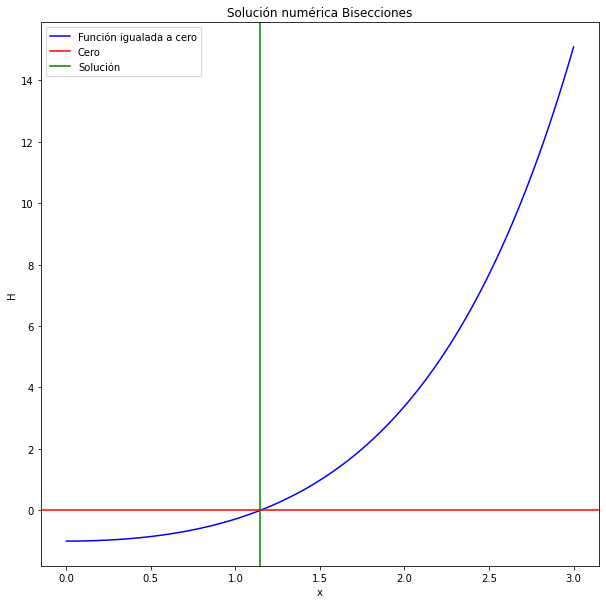

In [149]:
u=np.linspace(0,3,100)

plt.figure(figsize=(10,10))
plt.title('Solución numérica Bisecciones')
plt.plot(u,np.exp(u), color='r', label='Lado izquierdo')
plt.plot(u,u+2, color='b', label='Lado derecho')
plt.axvline(x=sol, color='g', label='Solución')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()

plt.figure(figsize=(10,10))
plt.title('Solución numérica Bisecciones')
plt.plot(u,funcion(u), color='b', label='Función igualada a cero')
plt.axhline(y=0, color='r', label='Cero')
plt.axvline(x=sol, color='g', label='Solución')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()


# Modelo de Lucas

Vamos a partir de 
$$f(u^*)=g(u^*)$$
$$\left[\beta\left(\frac{(2\alpha-1)}{1-\alpha}bu^*+1+b\right)\right]^{\frac{1}{1-\alpha}}-1=b(1-u^*)$$

Transformamos la función de manera que sea
$$H(u^*)=\left[\beta\left(\frac{(2\alpha-1)}{1-\alpha}bu^*+1+b\right)\right]^{\frac{1}{1-\alpha}}-1-b(1-u^*)=0$$

Y podemos encontrar fácilmente la derivada de esta función: 

$$H'(u^*)=\frac{1}{1-\alpha}\left[\beta\left(\frac{(2\alpha-1)}{1-\alpha}bu^*+1+b\right)\right]^{\frac{1}{1-\alpha}-1}\frac{(2\alpha-1)}{1-\alpha}b+b$$

Noten que en este caso es preferible que derivemos directamente y no con logaritmos, pues necesitamos el valor exacto para poder graficar.

Vamos a partir de los parámetros iniciales
- $\beta=0.5$
- $\alpha=0.7$
- $b=0.5$

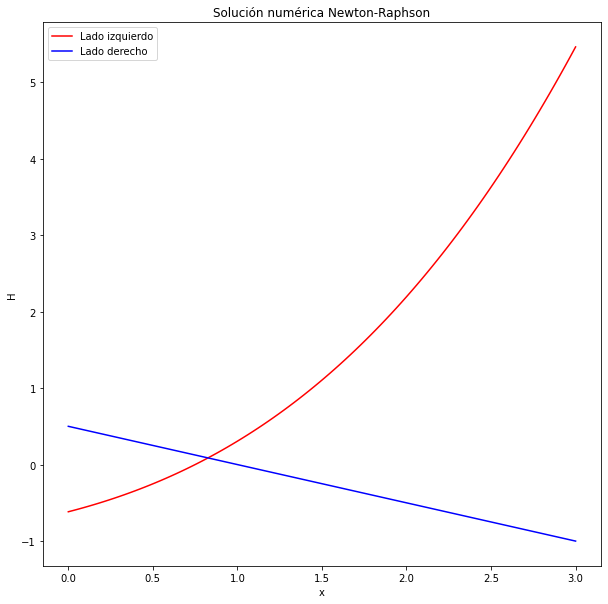

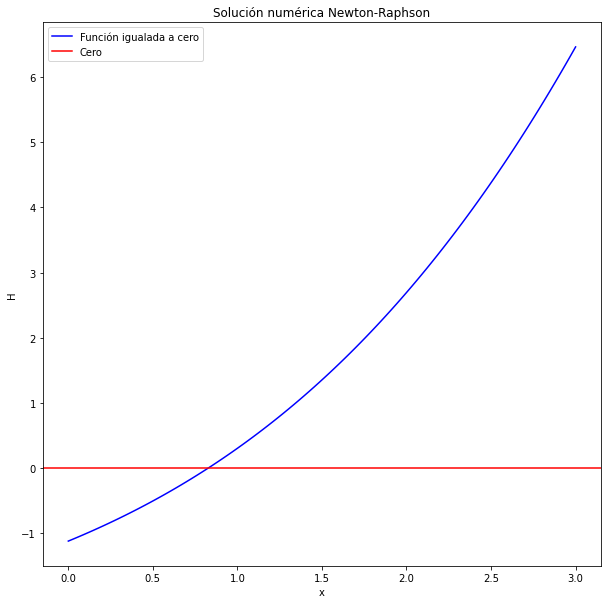

In [151]:
#Método de Newton-Raphson
# Parámetros:
beta=0.5
alpha=0.7
b=0.5

#Función:

def funcion(x):
    return (beta*(((2*alpha-1)/(1-alpha))*b*x+1+b))**(1/(1-alpha))-1-b*(1-x)


def derivada(x): 
    return (1/(1-alpha))*(beta*(((2*alpha-1)/(1-alpha))*b*x+1+b))**((1/(1-alpha))-1)*((2*alpha-1)/(1-alpha))*b+b

u=np.linspace(0,3,100) #El espacio de la gráfica va de 0 a 3

plt.figure(figsize=(10,10))
plt.title('Solución numérica Newton-Raphson')
plt.plot(u,(beta*(((2*alpha-1)/(1-alpha))*b*u+1+b))**(1/(1-alpha))-1, color='r', label='Lado izquierdo') #También podría definir arriba estas funciones
plt.plot(u,b*(1-u), color='b', label='Lado derecho')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()

plt.figure(figsize=(10,10))
plt.title('Solución numérica Newton-Raphson')
plt.plot(u,funcion(u), color='b', label='Función igualada a cero')
plt.axhline(y=0, color='r', label='Cero')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()


0.8260475581329645


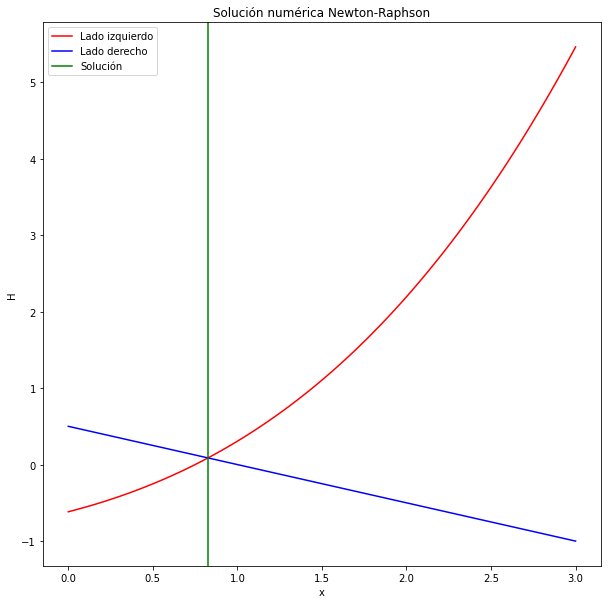

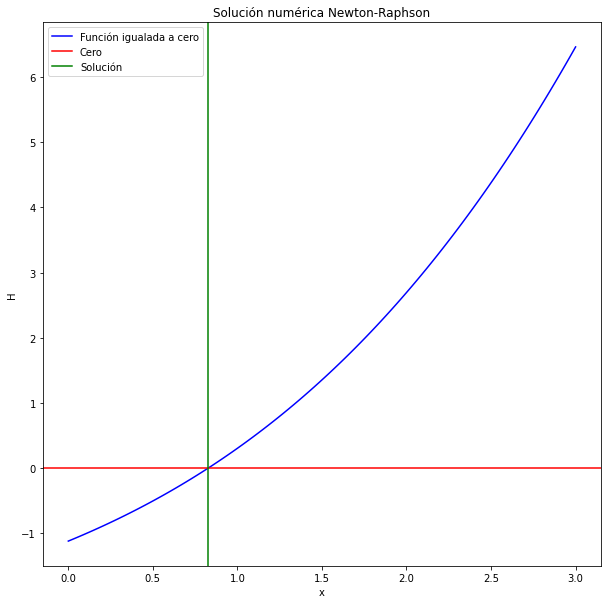

In [152]:
def NR(x,N):
    for i in range(N):
        x=x-(funcion(x)/derivada(x))
    return x

sol=NR(1,10)
print(sol)
#La solución va a ser 0.8260

u=np.linspace(0,3,100)


plt.figure(figsize=(10,10))
plt.title('Solución numérica Newton-Raphson')
plt.plot(u,(beta*(((2*alpha-1)/(1-alpha))*b*u+1+b))**(1/(1-alpha))-1, color='r', label='Lado izquierdo')
plt.plot(u,b*(1-u), color='b', label='Lado derecho')
plt.axvline(x=sol, color='g', label='Solución')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()

plt.figure(figsize=(10,10))
plt.title('Solución numérica Newton-Raphson')
plt.plot(u,funcion(u), color='b', label='Función igualada a cero')
plt.axhline(y=0, color='r', label='Cero')
plt.axvline(x=sol, color='g', label='Solución')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()



In [153]:
#Método de bisecciones

def bis(inf,sup,pres):
#inf:= cota inferior inicial del intervalo de busqueda, fin:=cota superior inicial del intervalo de busqueda, pres:=presicion en numero de cifras decimales
#Para que funcione, la funcion ha de ser continua, debe suceder que fun(inf)*fun(sup)<0 de modo que la funcion haya cambiado de signo en [inf,sup], lo que garantiza que hay al menos un cero
    med=(sup+inf)/2
    cero=0
    while (sup-inf)/2>pres:
        if funcion(med)==0:
            cero=med
        elif funcion(inf)*funcion(med)<0:
            sup=med
        else:
            inf=med
        med=(sup+inf)/2
        cero=med
    return cero



In [154]:
#Sabemos que el cero está entre 0 y 1 porque $u^*$ es una proporción. Si le damos un intervalo más grande se demora un poco más
sol=bis(0,1,0.00001) 
print(sol)

0.8260116577148438


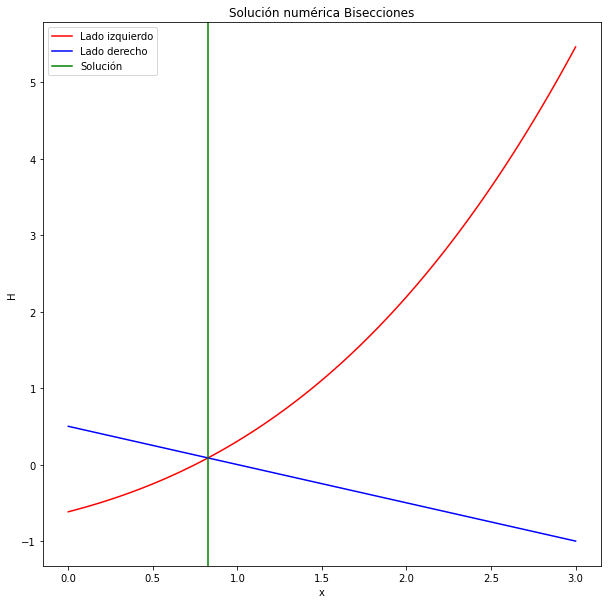

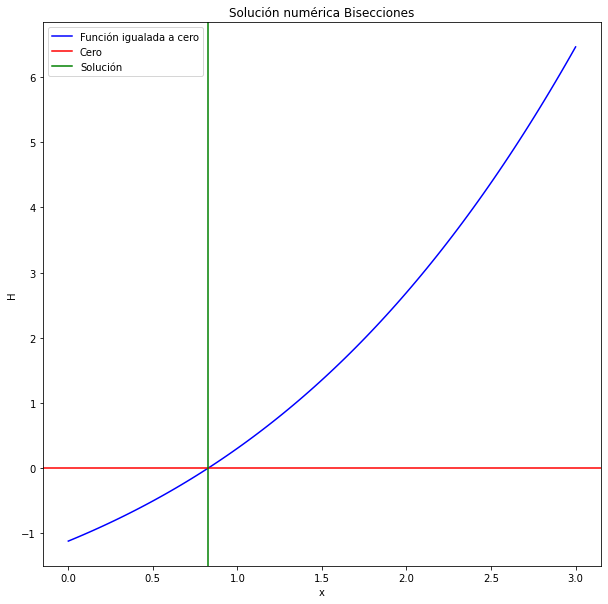

In [155]:
u=np.linspace(0,3,100)

plt.figure(figsize=(10,10))
plt.title('Solución numérica Bisecciones')
plt.plot(u,(beta*(((2*alpha-1)/(1-alpha))*b*u+1+b))**(1/(1-alpha))-1, color='r', label='Lado izquierdo')
plt.plot(u,b*(1-u), color='b', label='Lado derecho')
plt.axvline(x=sol, color='g', label='Solución')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()

plt.figure(figsize=(10,10))
plt.title('Solución numérica Bisecciones')
plt.plot(u,funcion(u), color='b', label='Función igualada a cero')
plt.axhline(y=0, color='r', label='Cero')
plt.axvline(x=sol, color='g', label='Solución')
plt.xlabel("x")
plt.ylabel("H")
plt.legend()
